In [1]:
#ボードゲーム「ロイヤルターフ」の解析です。しかし、挙動はランダムであり、人間の動きを全く考慮できません。あくまで参考値
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Horse:
    coloredHouse={  "orange"    :[[ 7, 1, 1, 7],[ 7, 3, 3, 3],[ 7, 5, 3, 1]],
                    "green"     :[[ 6, 1,10, 1],[ 6, 6, 4, 2],[ 6, 2, 2, 8]],
                    "yellow"    :[[ 5, 8, 1, 6],[ 5, 1, 1,13],[ 5, 6, 7, 2]],
                    "blue"      :[[ 4, 7, 3, 8],[ 4,10, 7, 1],[ 4, 1,13, 4]],
                    "red"       :[[ 3, 1, 5,15],[ 3,10,10, 1],[ 3, 9, 5, 7]],
                    "black"     :[[ 2, 9, 8, 7],[ 2, 5,11, 8],[ 2,14, 1, 9]],
                    "white"     :[[ 1, 8, 9,10],[ 1,15, 8, 4],[ 1, 3,12,12]]}

    allHorse=[ [[ 7, 1, 1, 7],[ 7, 3, 3, 3],[ 7, 5, 3, 1]],
                    [[ 6, 1,10, 1],[ 6, 6, 4, 2],[ 6, 2, 2, 8]],
                    [[ 5, 8, 1, 6],[ 5, 1, 1,13],[ 5, 6, 7, 2]],
                    [[ 4, 7, 3, 8],[ 4,10, 7, 1],[ 4, 1,13, 4]],
                    [[ 3, 1, 5,15],[ 3,10,10, 1],[ 3, 9, 5, 7]],
                    [[ 2, 9, 8, 7],[ 2, 5,11, 8],[ 2,14, 1, 9]],
                    [[ 1, 8, 9,10],[ 1,15, 8, 4],[ 1, 3,12,12]]]

    def __init__(self,color,num,startPlace):
        self.color=color
        self.status=True
        self.place=startPlace
        self.characteristicNum=num
        self.characteristic=self.coloredHouse[color][self.characteristicNum]
        self.goal=False
        self.betting=[]
        self.first18=False

In [3]:
class Player:
    def __init__(self):
        self.cash=0
        self.bettingList=[0,1,1,2]
        self.aleadybetList=[False,False,False,False]
        self.alreadyBetHorseList=[False,False,False,False,False,False,False]
        self.betVal=[-1,-1,-1,-1,-1,-1,-1]

    def bet(self,bettingRankList,betHorseRankList):

        betting=""
        betHorse=""
        for bettingNum in self.indexRanking(bettingRankList):
            if self.aleadybetList[bettingNum]==False:
                betting=self.bettingList[bettingNum]
                self.aleadybetList[bettingNum]=True

                for betHorseNum in self.indexRanking(betHorseRankList):
                    if self.alreadyBetHorseList[betHorseNum]==False:
                        betHorse=betHorseNum
                        self.alreadyBetHorseList[betHorseNum]=True
                        break
                break

        self.betVal[betHorse]=betting
        return betting,betHorse

    def indexRanking(self,listData):
        A=np.array(listData)
        A=A.argsort()[::-1]
        rankingData=A.tolist()
        return rankingData


In [4]:
class RoyalTurf:
    colorList=["orange","green","yellow","blue","red","black","white"]
    roll=["horse","horse","horse","knight","carrot","shoe"]
    rollToNum={"horse":0,"knight":1,"carrot":2,"shoe":3}
    returnList=[[ 500, 350, 250, 200, 150],
                [ 350, 250, 200, 150, 100],
                [ 250, 200, 150, 100, 100],
                [   0,   0,   0,   0,   0],
                [   0,   0,   0,   0,   0],
                [   0,   0,   0,   0,   0],
                [-100,-100,-100,-100,-100]]
    def __init__(self,playerNum):
        # random.shuffle(self.colorList)
        self.horseList=[]
        for color,startPlace in zip(self.colorList,range(0,-7,-1)):
            # num=random.randint(0,2)
            num=0
            self.horseList.append(Horse(color,num,startPlace))

        self.dice="horse"

        self.goalNum=0
        self.first18Num=0

        self.playerList=[]
        for i in range(playerNum):
            self.playerList.append(Player())

    def bet(self,playerNum,bettingRankList,betHorseRankList):
        betting,betHorse=self.playerList[playerNum].bet(bettingRankList,betHorseRankList)
        self.horseList[betHorse].betting.append([playerNum,betting])

    def diceing(self):
        self.dice=self.roll[random.randint(0,5)]
        # print(self.dice)

    def advanse(self,advanseRankList):
        
        for horseNum in self.indexRanking(advanseRankList):
            #順位が上位の者から動かす
            if (self.horseList[horseNum].status==True) and (self.horseList[horseNum].goal==False) and (self.goalNum<3):
                breakFlag=False
                move=self.horseList[horseNum].characteristic[self.rollToNum[self.dice]]
                moveTo=self.horseList[horseNum].place+move  #移動先
                while moveTo>self.horseList[horseNum].place: #移動先判定と補正
                        
                    breakFlag=True
                    for horse in self.horseList:
                        if moveTo==horse.place:
                            moveTo-=1
                            breakFlag=False
                            break
                    if breakFlag:
                        break
                self.horseList[horseNum].place=moveTo
                self.horseList[horseNum].status=False

                if self.horseList[horseNum].place>17 and self.first18Num<1:
                    self.horseList[horseNum].first18=True
                    self.first18Num+=1

                if self.horseList[horseNum].place>36:
                    self.horseList[horseNum].place=110-self.goalNum
                    self.horseList[horseNum].goal=True
                    self.goalNum+=1
                break
        
        #すべてひっくり返ったらすべて表にする #goalしたものは無視する
        flag=False
        for horse in self.horseList:
            if horse.goal==False:
                flag=flag or horse.status
        if flag==False:
            for horseNum in range(7):
                self.horseList[horseNum].status=True

        if self.goalNum>2:
            return False
        return True

    def ranking(self):
        if self.goalNum>2:
            placeList=[]
            for horse in self.horseList:
                placeList.append(horse.place)
            placeNum={}
            for horseNum,place in zip(range(7),placeList):
                placeNum[place]=horseNum
            horseNumList=[placeNum[place] for place in sorted(placeList)]
            for horseNum,rank in zip(horseNumList,range(1,8)):
                self.horseList[horseNum].goal=rank
            return True
        return False

    def divide(self):
        for horse in self.horseList:
            bettingSum=0
            for d in horse.betting:
                bettingSum+=d[1]
                
            returnRatio=self.returnList[horse.goal-1][min(bettingSum,4)]
            
            if (horse.first18==True) and (horse.goal<4):
                returnRatio+=100

            for playerNum in range(len(self.playerList)):
                for d in horse.betting:
                    if d[0]==playerNum:
                        self.playerList[playerNum].cash+=d[1]*returnRatio

    def cashStatus(self):
        cashList=[]
        for player in self.playerList:
            cashList.append(player.cash)
        return cashList

    def indexRanking(self,listData):
        A=np.array(listData)
        A=A.argsort()[::-1]
        rankingData=A.tolist()
        return rankingData


35
109
32
110
108
34
31


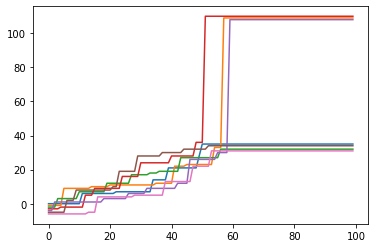

In [11]:
#馬の動きの推移
royalturf=RoyalTurf(3)

placelist=[[],[],[],[],[],[],[]]
for d in range(100):
    for horse,i in zip(royalturf.horseList,range(7)):
        placelist[i].append(horse.place)
    royalturf.diceing()
    advanseRankList=[]
    for i in range(7):
        advanseRankList.append(random.random())
    royalturf.advanse(advanseRankList)


for y in placelist:
    plt.plot(range(100),y)
    print(y[-1])

170.22
165.47
307.99
145.45
280.01


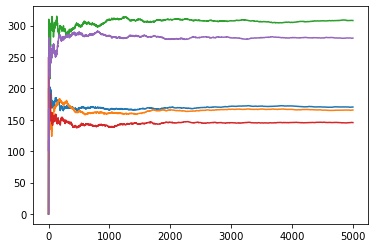

In [14]:
cashList=[[],[],[],[],[],[],[]]

bL=[[random.random() for i in range(4)] for _ in range(7)]
hL=[[random.random() for i in range(7)] for _ in range(7)]

for _ in range(5000):
    royalturf=RoyalTurf(5)

    #順番に賭ける
    for i in range(4):
        for playerNum in range(len(royalturf.playerList)):
            # bettingRank=[random.random() for i in range(4)]#ここをRainForceが判断
            # horseRank=[random.random() for i in range(7)]#ここをRainForceが判断
            bettingRank=bL[playerNum]#ここをRainForceが判断
            horseRank=hL[playerNum]#ここをRainForceが判断
            royalturf.bet(playerNum,bettingRank,horseRank)

    #ランダムに動かす
    for _ in range(200):
        royalturf.diceing()
        advanseRank=[random.random() for i in range(7)]#ここをRainForceが判断
        adFlag=royalturf.advanse(advanseRank)
        if adFlag==False:
            break

    #順位付け
    royalturf.ranking()

    #配当金分配
    royalturf.divide()

    #配当金を表示
    cash=royalturf.cashStatus()

    for i in range(len(royalturf.playerList)):
        cashList[i].append(royalturf.playerList[i].cash)

averageList=[[],[],[],[],[],[],[]]
for d,i in zip(cashList,range(len(cashList))):
    for j in range(len(d)):
        averageList[i].append(sum(d[:j])/(j+1))

for y in averageList[:len(royalturf.playerList)]:
    plt.plot(range(len(y)),y)
    print(y[-1])


In [7]:
bL[3]

[0.6011281718443107,
 0.3601267968346551,
 0.32985618212102386,
 0.2279959124434796]

In [8]:
bL

[[0.12987258983277794,
  0.49746733743655647,
  0.02198231589189148,
  0.8086507196874541],
 [0.6712366600208066,
  0.3603779088214518,
  0.2941748914786395,
  0.12817893424214577],
 [0.042889423928346604,
  0.41968390781065024,
  0.408353725986463,
  0.7964611685027702],
 [0.6011281718443107,
  0.3601267968346551,
  0.32985618212102386,
  0.2279959124434796],
 [0.24578589218644842,
  0.9221303785708332,
  0.21502482904435372,
  0.7419791983339306],
 [0.48480702500345396,
  0.9636157842633216,
  0.2921712621806406,
  0.8444177189292708],
 [0.16732604676069063,
  0.9606224327828108,
  0.31226697652458024,
  0.3476384357208373]]

In [9]:
hL

[[0.8944242761784774,
  0.3680885904947293,
  0.4669978329155344,
  0.28931865082652286,
  0.8843687366281047,
  0.04028586956139657,
  0.544218492526187],
 [0.585684335155577,
  0.9835150533662921,
  0.05182848317140165,
  0.3181228183867244,
  0.10754807462171745,
  0.8265530552477146,
  0.28965353261092075],
 [0.13725452954359618,
  0.6941250776734122,
  0.4162920979952601,
  0.46501738069377574,
  0.5397572063926082,
  0.8626915809045479,
  0.7795168353596597],
 [0.7336891100398114,
  0.22879282881984586,
  0.2921213511949198,
  0.8453907100501376,
  0.03726484013379783,
  0.7045560113941438,
  0.15240976094137593],
 [0.008855595705657415,
  0.7092000709445789,
  0.9361340356484569,
  0.60680800334769,
  0.6473432171997623,
  0.24312400986301252,
  0.26128027414318256],
 [0.502687280283231,
  0.28558490286789995,
  0.06094877220617556,
  0.23720831507795181,
  0.039552302035883,
  0.41890656791167313,
  0.752057577466416],
 [0.7151698489118349,
  0.12216369059276333,
  0.6313822595